In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
data=pd.read_csv("C:\\EVARCITY\\Data Science\\Evarcity\\Bank_Full.csv")

In [3]:
data.shape

(45211, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The given data has 16 independent variables. Data does not has a duplicated recordings and non of the variables has a missing values.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Observations:
1) Adult customers are targated for the campaign with average age of 41yeras.

2) On an average customers are interacted for 258sec (4.3min) with campaign executive on phone call.

3) In this campaign 75 percentile of the customers are contacted for three times.

4) Most of the customers in this campaign are new, 75 percentile of them are not contacted before(zero contacts). 

In [8]:
data.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


Obervations:
1) Cutomers with'Blue-Collar' job category are highest in the dataset and constitute almost 20% of the population.

2) Almost 60% the customers in the campaign are married.

3) 50% the them have completed their secondary level of education.

4) 2% of the customers in the campaign are credit defaulted.

5) More than 50% of the customers have a housing loan.

6) Almost 65% of the them are contacted on the cellular phone.

7) Slightly more than 80% of the attampts are resulted in the unknown outcome.

<AxesSubplot:>

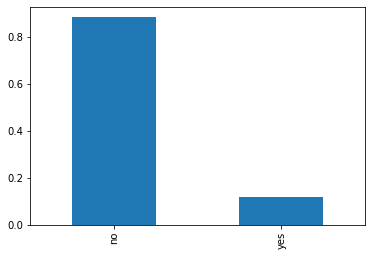

In [9]:
data.y.value_counts(normalize=True).plot(kind='bar')

In [10]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

The barplot indicate that 5289 number of customers(11.7%) have subscribed for the term deposit.

# Analysis of Inter Relationship Between Categorical Variables 

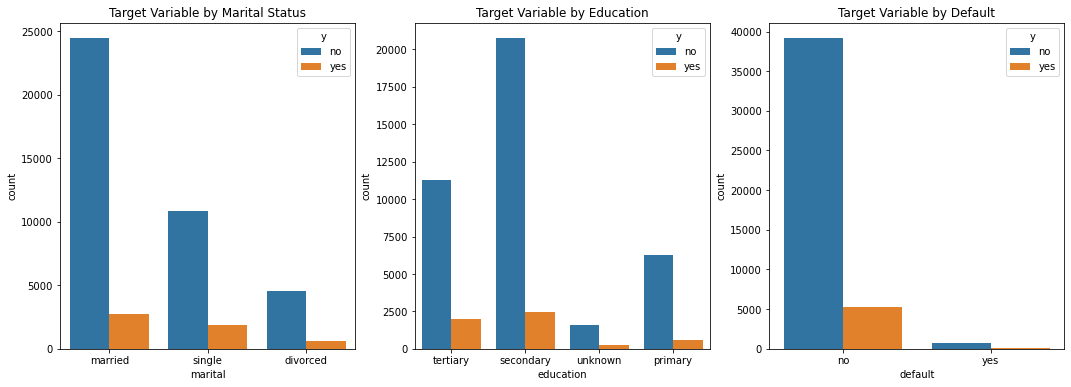

In [11]:
fig, axes=plt.subplots(1,3, figsize=(18,6))
sns.countplot(x='marital', hue='y', data=data, ax=axes[0]).set_title('Target Variable by Marital Status')
sns.countplot(x='education', hue='y', data=data, ax=axes[1]).set_title('Target Variable by Education')
sns.countplot(x='default', hue='y', data=data, ax=axes[2]).set_title('Target Variable by Default')
plt.show()

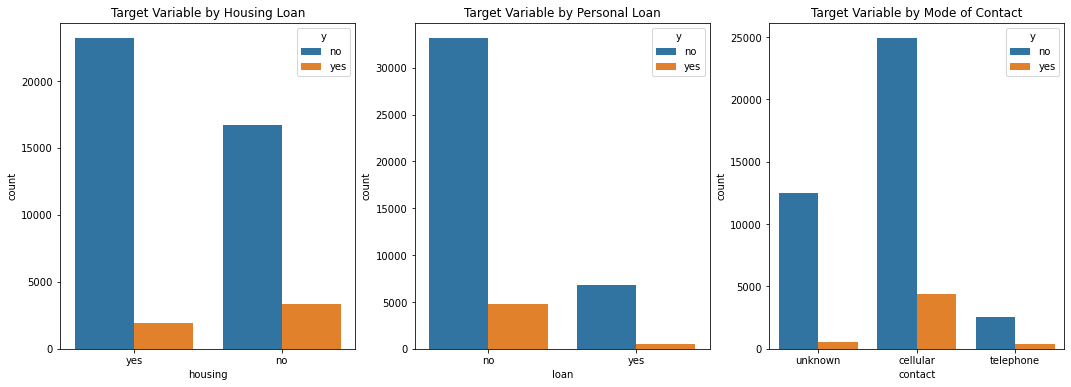

In [12]:
fig, axes=plt.subplots(1,3, figsize=(18,6))
sns.countplot(x='housing', hue='y', data=data, ax=axes[0]).set_title('Target Variable by Housing Loan')
sns.countplot(x='loan', hue='y', data=data, ax=axes[1]).set_title('Target Variable by Personal Loan')
sns.countplot(x='contact', hue='y', data=data, ax=axes[2]).set_title('Target Variable by Mode of Contact')
plt.show()

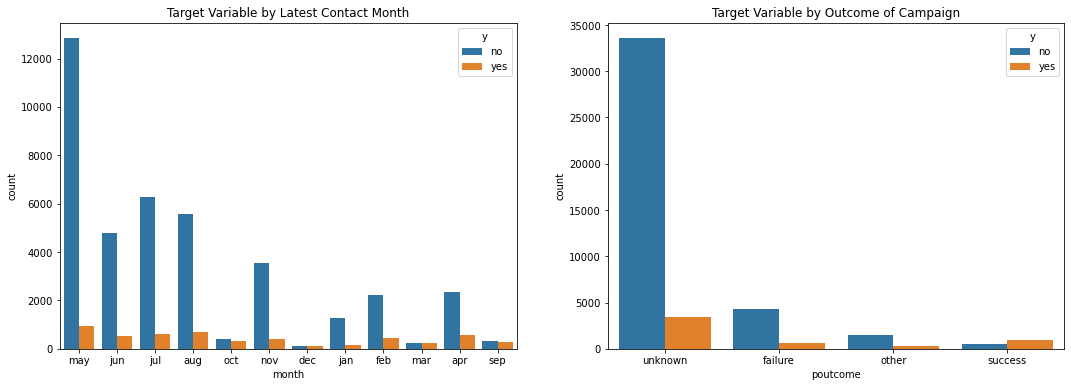

In [13]:
figure, axes=plt.subplots(1,2, figsize=(18,6))
sns.countplot(x='month', hue='y', data=data, ax=axes[0]).set_title('Target Variable by Latest Contact Month')
sns.countplot(x='poutcome', hue='y', data=data, ax=axes[1]).set_title('Target Variable by Outcome of Campaign')
plt.show()

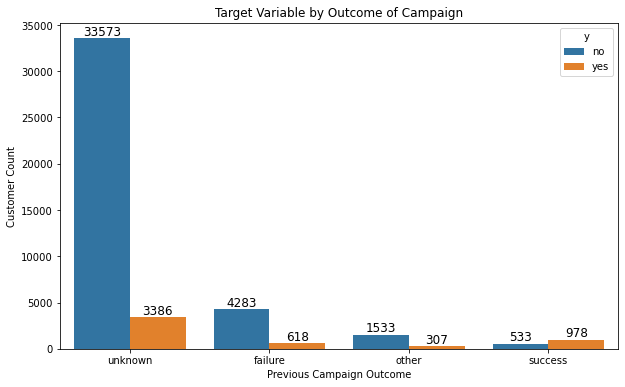

In [14]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='poutcome', hue='y', data=data)
ax.set_title('Target Variable by Outcome of Campaign')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',va='bottom',size=12)
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Customer Count")
plt.show()

Total number of outcome of previous campaign as success is 1511 , out of which 978 also subscribe for term deposit as y='yes'.
so 64% previous campaign client agreed to subscribe for term deposit.


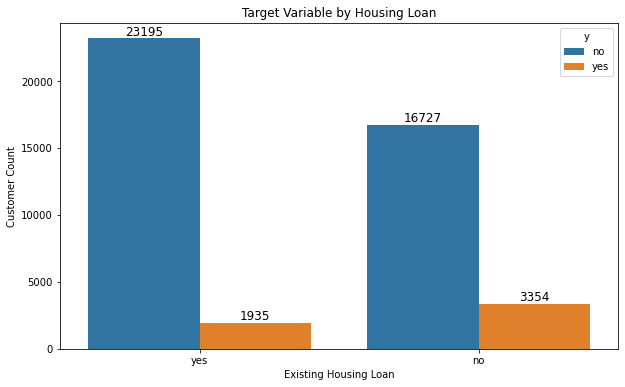

In [15]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='housing', hue='y', data=data)
ax.set_title('Target Variable by Housing Loan')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1), ha='center',va='bottom',size=12)
plt.xlabel("Existing Housing Loan")
plt.ylabel("Customer Count")
plt.show()

64% (3354/5289) client have no housing loan who subscribed for term deposit.

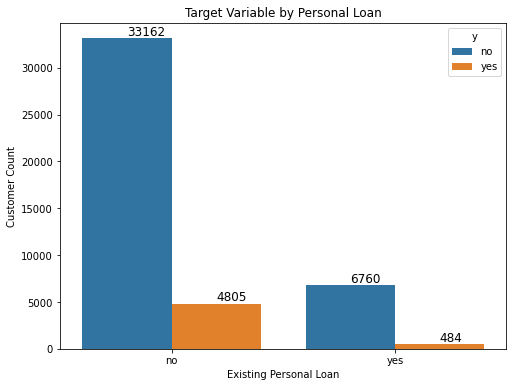

In [16]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='loan', hue='y', data=data)
ax.set_title('Target Variable by Personal Loan')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1), va='bottom',size=12)
plt.xlabel("Existing Personal Loan")
plt.ylabel("Customer Count")
plt.show()

90% (4805/6760) client doesn't  have personel loan who subscribed for term deposit.

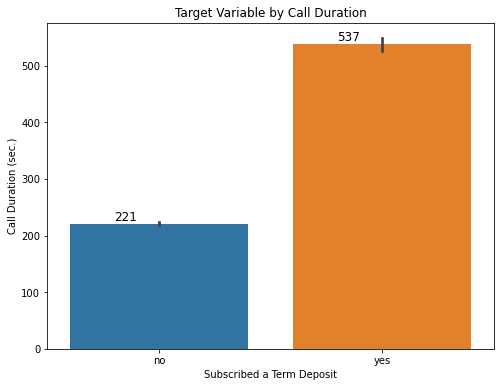

In [17]:
plt.figure(figsize=(8,6))
ax=sns.barplot(y='duration', x='y', data=data)
ax.set_title('Target Variable by Call Duration')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1), va='bottom',size=12)
plt.xlabel("Subscribed a Term Deposit")
plt.ylabel("Call Duration (sec.)")
plt.show()

On an average 537 sec duration was elapsed who subscribed for term deposit.

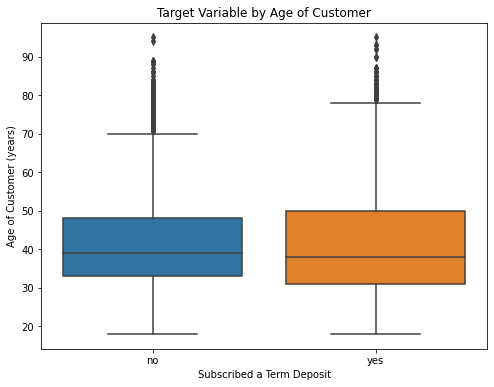

In [18]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(y='age', x='y', data=data)
ax.set_title('Target Variable by Age of Customer')
plt.xlabel("Subscribed a Term Deposit")
plt.ylabel("Age of Customer (years)")
plt.show()

Majority of clients who subscribed for term deposit having age between 31 - 50 years.

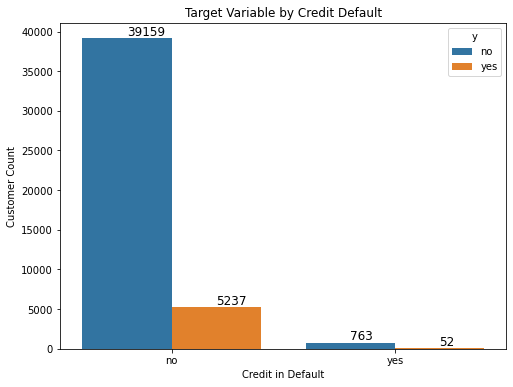

In [19]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='default', hue='y', data=data)
ax.set_title('Target Variable by Credit Default')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1), va='bottom',size=12)
plt.xlabel("Credit in Default")
plt.ylabel("Customer Count")
plt.show()

99% (5237/5289) clients who subscribed for term deposit doesn't have any credit default.

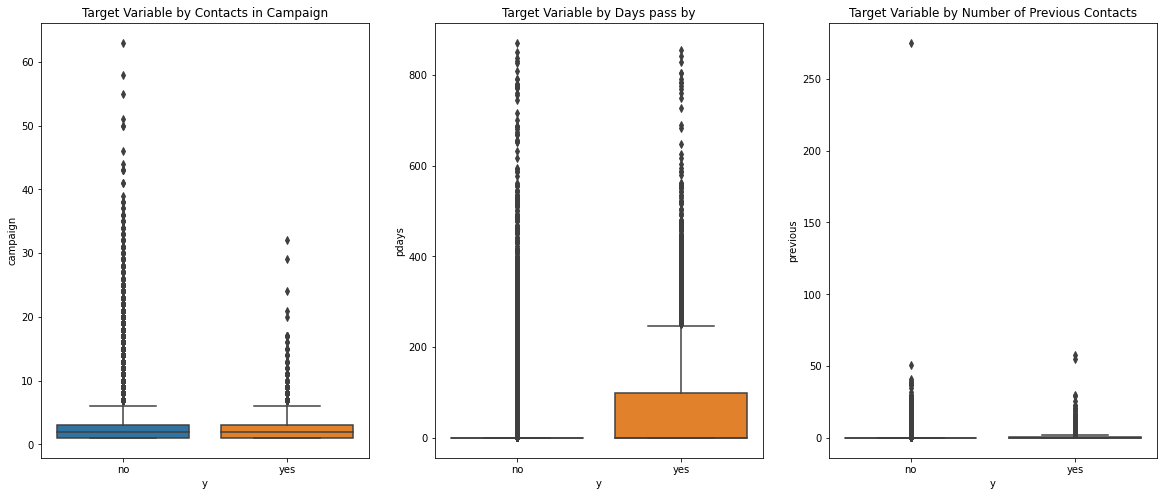

In [20]:
fig, axes=plt.subplots(1,3, figsize=(20,8))
sns.boxplot(y='campaign', x='y', data=data, ax=axes[0]).set_title('Target Variable by Contacts in Campaign')
sns.boxplot(y='pdays', x='y', data=data, ax=axes[1]).set_title('Target Variable by Days pass by')
sns.boxplot(y='previous', x='y', data=data, ax=axes[2]).set_title('Target Variable by Number of Previous Contacts')
plt.show()

# Preparing Data for Analysis

In [21]:
#Label encoding the categorical variables.
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['marital']=le.fit_transform(data['marital'])
data['education']=le.fit_transform(data['education'])
data['default']=le.fit_transform(data['default'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])
data['contact']=le.fit_transform(data['contact'])
data['month']=le.fit_transform(data['month'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['y']=le.fit_transform(data['y'])

# Relevent Independent Variable Selection

In [22]:
# Relevent Feature Selection using Recursive Feature Elimination
x=data.drop(['y'],1)
y=data['y']
labels=list(x)
scaler=MinMaxScaler()
x_trans=scaler.fit_transform(x)

#Reconverting The x in DataFrame.
x=pd.DataFrame(x_trans, columns=labels)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.0,0.0,0.0,1.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.0,0.0,0.0,1.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0,1.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.0,0.0,0.0,1.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.0,0.0,0.0,1.0


In [23]:
from sklearn.feature_selection import RFE
rfe=RFE(DecisionTreeClassifier(), 8)

rfe_fit=rfe.fit(x,y)
print("RFE Support:", rfe_fit.support_)
print("\n RFE Ranking: ", rfe_fit.ranking_)
print("\n Original Feature List: ",list(x))

RFE Support: [ True  True False False False  True False False False  True  True  True
 False  True False  True]

 RFE Ranking:  [1 1 5 4 9 1 3 8 6 1 1 1 2 1 7 1]

 Original Feature List:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [24]:
#Relevent Feature List
feature_list=['age', 'job', 'balance', 'day', 'month', 'duration', 'pdays', 'poutcome']

In [25]:
x_relevent=x[['age', 'job', 'balance', 'day', 'month', 'duration', 'pdays', 'poutcome']]
x_relevent.head()

,age,job,balance,day,month,duration,pdays,poutcome
0,0.519481,0.363636,0.092259,0.133333,0.727273,0.053070,0.0,1.0
1,0.337662,0.818182,0.073067,0.133333,0.727273,0.030704,0.0,1.0
2,0.194805,0.181818,0.072822,0.133333,0.727273,0.015453,0.0,1.0
3,0.376623,0.090909,0.086476,0.133333,0.727273,0.018707,0.0,1.0
4,0.194805,1.000000,0.072812,0.133333,0.727273,0.040260,0.0,1.0


# Optimum Test Size Selection

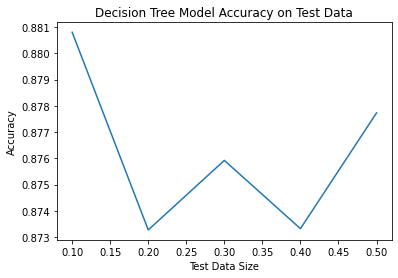

In [26]:
test_list=[0.1,0.2,0.3,0.4,0.5]
acc_list=[]
for num in test_list:
    x_train, x_test, y_train, y_test=tts(x, y, test_size=num, random_state=1)
    #Model building
    dtc=DecisionTreeClassifier(criterion='entropy')
    model1=dtc.fit(x_train, y_train)
    dtc_pred=model1.predict(x_test)
    acc=metrics.accuracy_score(y_test, dtc_pred)
    #Appending the model accuracy per test size
    acc_list.append(acc)
    
plt.plot(test_list, acc_list)
plt.title("Decision Tree Model Accuracy on Test Data")
plt.xlabel("Test Data Size")
plt.ylabel("Accuracy")
plt.show()

Decision tree model has best accuracy score at test data size of 10% on the given dataset.

# Decision Tree Model Building

In [27]:
#Consider a test size of 10%.
x_train, x_test, y_train, y_test=tts(x, y, test_size=0.1, random_state=1)
#Model building
dtc=DecisionTreeClassifier(criterion='entropy')
model2=dtc.fit(x_train, y_train)

y_pred_train=model2.predict(x_train)
y_pred_test=model2.predict(x_test)

#Accuracy On train Data
print("Confusion matrix Train", confusion_matrix(y_train, y_pred_train))
print("\n Accuracy Score Train", accuracy_score(y_train, y_pred_train))

#Accuracy on test data
print("Confusion matrix Test", confusion_matrix(y_test, y_pred_test))
print("\n Accuracy Score Test", accuracy_score(y_test, y_pred_test))
print("\n Recall score Test", recall_score(y_test, y_pred_test))
print("\n Precision Score Test", precision_score(y_test, y_pred_test))



Confusion matrix Train [[35939     0]
 [    0  4750]]

 Accuracy Score Train 1.0
Confusion matrix Test [[3692  291]
 [ 259  280]]

 Accuracy Score Test 0.8783724015922159

 Recall score Test 0.5194805194805194

 Precision Score Test 0.4903677758318739


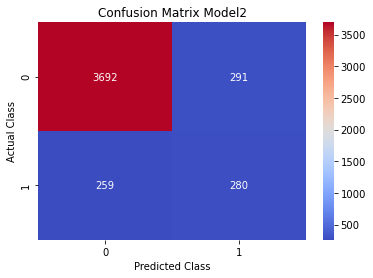

In [28]:
class_name=[0,1]
tick_marks=np.arange(len(class_name))

plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_test)),annot=True, cmap='coolwarm', fmt='g')

plt.title("Confusion Matrix Model2")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Model Optimization

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11]}
decision_grid=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, refit=True, verbose=0)
decision_grid.fit(x_train, y_train)

print(decision_grid.best_estimator_)
print(decision_grid.best_score_)
print(decision_grid.best_params_)

DecisionTreeClassifier(max_depth=8)
0.9004154490399507
{'max_depth': 8}


In [30]:
#Consider a test size of 10% and depth of tree as 8.
x_train, x_test, y_train, y_test=tts(x, y, test_size=0.1, random_state=1)
#Model building
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=8)
model3=dtc.fit(x_train, y_train)

y_pred_train=model3.predict(x_train)
y_pred_test=model3.predict(x_test)

#Accuracy On train Data
print("Confusion matrix Train", confusion_matrix(y_train, y_pred_train))
print("\n Accuracy Score Train", accuracy_score(y_train, y_pred_train))

#Accuracy on test data
print("Confusion matrix Test", confusion_matrix(y_test, y_pred_test))
print("\n Accuracy Score Test", accuracy_score(y_test, y_pred_test))
print("\n Recall score Test", recall_score(y_test, y_pred_test))
print("\n Precision Score Test", precision_score(y_test, y_pred_test))

Confusion matrix Train [[34715  1224]
 [ 2318  2432]]

 Accuracy Score Train 0.9129494457961611
Confusion matrix Test [[3820  163]
 [ 290  249]]

 Accuracy Score Test 0.8998230871295887

 Recall score Test 0.4619666048237477

 Precision Score Test 0.6043689320388349


The accuracy of decision tree model is improved to 90% on test data. The accuracy on test and train data is amlost equal which indicates that decision tree is not over / under fitted.

Optimum paramesrs are:

1) Information gain criterion= Entropy.

2) Test data size= 10%.

3) Max Depth of Decision tree= 8.

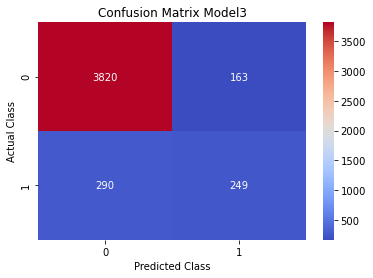

In [31]:
# Display the confusion matrix
class_name=[0,1]
tick_marks=np.arange(len(class_name))

plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_test)), annot=True, cmap='coolwarm', fmt='g')

plt.title("Confusion Matrix Model3")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Considering The Feature List Derived from RFE

In [32]:
# list of features by Recursive Feature Elimination Method is:
x_relevent=x[['age', 'job', 'balance', 'day', 'month', 'duration', 'pdays', 'poutcome']]

x_train, x_test, y_train, y_test=tts(x_relevent, y, test_size=0.1, random_state=1)
#Model building
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=8)
model4=dtc.fit(x_train, y_train)

y_pred_train_rfe=model4.predict(x_train)
y_pred_test_rfe=model4.predict(x_test)

#Accuracy On train Data
print("Confusion matrix Train", confusion_matrix(y_train, y_pred_train_rfe))
print("\n Accuracy Score Train", accuracy_score(y_train, y_pred_train_rfe))

#Accuracy on test data
print("Confusion matrix Test", confusion_matrix(y_test, y_pred_test_rfe))
print("\n Accuracy Score Test", accuracy_score(y_test, y_pred_test_rfe))
print("\n Recall score Test", recall_score(y_test, y_pred_test_rfe))
print("\n Precision Score Test", precision_score(y_test, y_pred_test_rfe))

Confusion matrix Train [[34916  1023]
 [ 2503  2247]]

 Accuracy Score Train 0.91334267246676
Confusion matrix Test [[3829  154]
 [ 314  225]]

 Accuracy Score Test 0.8965059708093763

 Recall score Test 0.4174397031539889

 Precision Score Test 0.5936675461741425


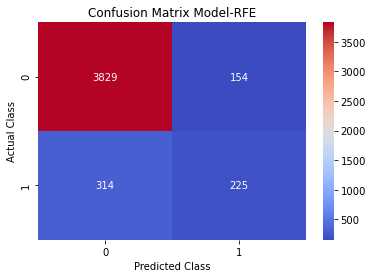

In [33]:
class_name=[0,1]
tick_mark=np.arange(len(class_name))

plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_test_rfe)), cmap='coolwarm', fmt='g', annot=True)

plt.title("Confusion Matrix Model-RFE")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

The relevent features selected by RFE methos #8 out of #16 are giving same accuracy as that of model with all #16. 

# Model Export for Deployment

In [34]:
import pickle
file_name='Term_Deposit.sav'
pickle.dump(model4, open(file_name, 'wb'))